# Step 1 - Reading the data

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_and_display_images(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # OpenCV reads images in BGR format, convert it to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    return img_rgb

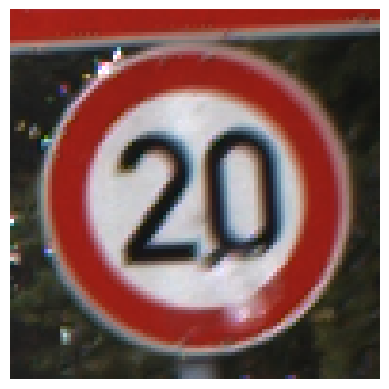

In [17]:
image_path = "./dataset/GTSRB/Final_Training/Images/00000/00000_00026.ppm"
sign_image = read_and_display_images(image_path)

# Applying filter

(-0.5, 96.5, 96.5, -0.5)

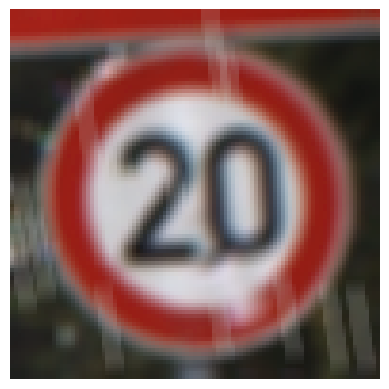

In [23]:
import albumentations as A
transform_image = A.Compose(
     [A.RandomRain(brightness_coefficient=1, drop_width=1, blur_value=5, p=1)]
)
transformed = transform_image(image=sign_image)
image = transformed['image']
# Display the image
plt.imshow(image)
plt.axis('off')

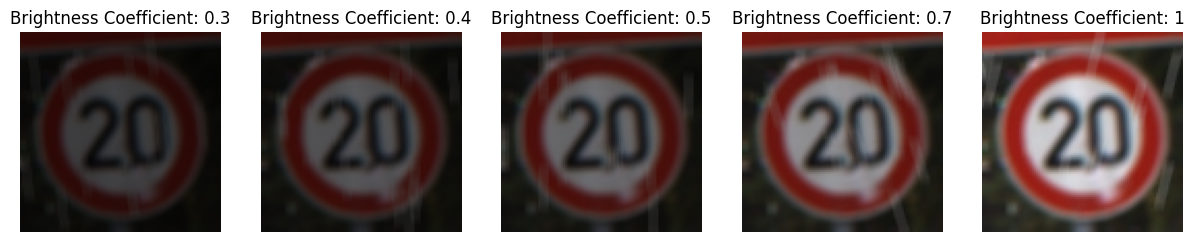

In [33]:
import albumentations as A
import matplotlib.pyplot as plt

# List to store transformed images
transformed_images = []

# List of brightness_coefficient values
brightness_coefficients = [0.3, 0.4, 0.5, 0.7, 1]

# Create and apply transformations for each brightness coefficient
for brightness_coefficient in brightness_coefficients:
    transform_image = A.Compose([
        A.RandomRain(brightness_coefficient=brightness_coefficient, 
                     drop_width=1, blur_value=5, p=1)
    ])
    transformed = transform_image(image=sign_image)
    transformed_images.append(transformed['image'])

# Display all transformed images side by side
plt.figure(figsize=(15, 5))
for i, image in enumerate(transformed_images):
    plt.subplot(1, len(transformed_images), i + 1)
    plt.imshow(image)
    plt.title(f"Brightness Coefficient: {brightness_coefficients[i]}")
    plt.axis('off')

plt.show()